In [ ]:
#Dawit Reda
#ID#10189420
#MCIS 540 - Project
#Programming for the Data Science
#Submitted to Dr. Daniel Wu

# MCIS 540 - Project

In [64]:
#This project performs data cleaning, processing and analysis for the state of Pennsylvania counties poverty data collected by
#the 2016 U.S. census.

In [65]:
#import all important libraries 
from tabulate import tabulate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
'''
Find the county with the highest percentage of children in poverty and print its name,
percentage, count of children in poverty and the median household income.
Each print specified above will print the same data so create a print_data
'''

'\nFind the county with the highest percentage of children in poverty and print its name,\npercentage, count of children in poverty and the median household income.\nEach print specified above will print the same data so create a print_data\n'

In [67]:
def print_data():
    #file path url
    url = 'https://www2.census.gov/programs-surveys/saipe/datasets/2016/2016-state-and-county/est16all.xls'
    # Load the data into a dataframe
    df = pd.read_excel(url, skiprows=2, index_col=None,  header=1) 
    #filter for PA only with Postal Code == 'PA'
    df_PA = df['Postal Code']=='PA' 
    df = df[df_PA]
    #remove the first row 
    df= df.iloc[1:]
    return df
print_data().head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,...,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
2284,42,1,PA,Adams County,9218,7624,10812,9.4,7.8,11,...,15.6,59645,55921,63369,.,.,.,.,.,.
2285,42,3,PA,Allegheny County,137017,128609,145425,11.5,10.8,12.2,...,15.5,56099,54991,57207,.,.,.,.,.,.
2286,42,5,PA,Armstrong County,9100,7778,10422,13.8,11.8,15.8,...,21.6,46968,44040,49896,.,.,.,.,.,.
2287,42,7,PA,Beaver County,15998,12958,19038,9.7,7.9,11.5,...,17.3,54715,52621,56809,.,.,.,.,.,.
2288,42,9,PA,Bedford County,6550,5607,7493,13.7,11.7,15.7,...,19.7,44834,41428,48240,.,.,.,.,.,.


In [68]:
'''
Find the county with the highest percentage of children in poverty and print its name,
percentage, count of children in poverty and the median household income.
Create a function for the highest percentage data: print_highest_data
'''

'\nFind the county with the highest percentage of children in poverty and print its name,\npercentage, count of children in poverty and the median household income.\nCreate a function for the highest percentage data: print_highest_data\n'

In [69]:
#Create a function for the highest percentage data: print_highest_data
def print_highest_data():
    highest_data = print_data()
    #get the hight poverity out Poverty Percent, Age 0-17 column
    max_poverity = highest_data[highest_data['Poverty Percent, Age 0-17'] == highest_data['Poverty Percent, Age 0-17'].max()]
    return max_poverity[['Name','Poverty Percent, Age 0-17','Poverty Estimate, Age 0-17','Median Household Income']]
print_highest_data()

,Name,"Poverty Percent, Age 0-17","Poverty Estimate, Age 0-17",Median Household Income
2310,Forest County,57.1,124,38819


In [ ]:
'''
Find the county with the lowest percentage of children in poverty and print its name,
percentage, count of children in poverty and the median household income
Create a function for the lowest percentage data: print_lowest_data
'''

In [71]:
#Create a function for the lowest percentage data: print_lowest_data
def print_lowest_data():
    lowest_data = print_data()
     #get the lowest poverity out Poverty Percent, Age 0-17 column
    lowest_poverity = lowest_data[lowest_data['Poverty Percent, Age 0-17'] == lowest_data['Poverty Percent, Age 0-17'].min()]
    return lowest_poverity[['Name','Poverty Percent, Age 0-17','Poverty Estimate, Age 0-17','Median Household Income']]
print_lowest_data()

,Name,"Poverty Percent, Age 0-17","Poverty Estimate, Age 0-17",Median Household Income
2298,Chester County,7.5,8822,92551


In [ ]:
'''
Loop to continually prompt for a county and print its name, percentage, count of children
in poverty and the median household income. The entered value should not be case
sensitive and only the county name is used, i.e. entering “chester” or “Chester” gets the
data for Chester County (that is, you don’t search using “Chester County”). Re-prompt if
county is not found. Type ‘q’ or ‘quit’ in any case to quit the loop
'''

In [72]:
#Create a function for the county data: print_county_data
def PA_county_helper():
    county_data = print_data()
    for a in county_data['Name']:
        county_data.set_index('Name', drop=True, append=False, inplace=False, verify_integrity=False)
        county_data_info = county_data[['Name','Poverty Percent, Age 0-17','Poverty Estimate, Age 0-17','Median Household Income']]  
        Name_of_county = county_data_info['Name'].str.split(" ", n = 1, expand = True)
        county_data_info.insert(loc=0, column='County Name', value=Name_of_county[0])
    return county_data_info

In [60]:
#Loop to continually prompt for a county and print its name, percentage, 
#count of children in poverty and the median household income
def print_county_data(county):
    #remove extra white space and lower the case of the user input
    counties_userinput = county.lower().strip()
    #load counties info from function print_PA_county_data
    PA_counties_list = PA_county_helper()
    #get the name of the county
    Name_of_counties = PA_counties_list['Name']
    #iterate the lists 
    lists_of_county_name =[i.split(' ', 1)[0] for i in Name_of_counties]
    
    #boolean if the county is found
    is_County_Found = False
    #for loof to iterate in each county
    for a in lists_of_county_name:    
        #compare the user input county, if found continue
        if a.lower() == counties_userinput:
            #get the counties info 
            counties_info = PA_counties_list.loc[PA_counties_list['County Name'].str.lower() == counties_userinput]
            #remove unnecessary column 
            PA_counties_infos = counties_info.drop(['County Name'], axis=1)
            #print out the result in tabulate form(making it clean table)
            print(tabulate(PA_counties_infos, headers='keys', tablefmt='psql'))
            is_County_Found = True
            #if the county is found break, if not the isCounty will be false
            break
    #print out the county is not found message
    if(is_County_Found==False):
        print('the county is not in the PA state.....')
    
    #redo all the steps if the user asks to fetch the county info
    check_user_input = input('Please enter "y or Yes" to continue fetching the PA county info, if not Type ‘q’ or ‘quit’:')
    lower_user_input = check_user_input.lower()
    if lower_user_input =='y' or lower_user_input == 'yes':
        user_input = input("Please select a PA county to display it's info:")
        print_county_data(user_input)
    elif lower_user_input !='y':
        print('Thank you for visiting us! \n')
#test the function by passing a userinput
user_input = input("Please select a PA county to display it's info:")
print_county_data(user_input)

Please select a PA county to display it's info:Forest
+------+---------------+-----------------------------+------------------------------+---------------------------+
|      | Name          |   Poverty Percent, Age 0-17 |   Poverty Estimate, Age 0-17 |   Median Household Income |
|------+---------------+-----------------------------+------------------------------+---------------------------|
| 2310 | Forest County |                        57.1 |                          124 |                     38819 |
+------+---------------+-----------------------------+------------------------------+---------------------------+
Please enter "y or Yes" to continue fetching the PA county info, if not Type ‘q’ or ‘quit’:y
Please select a PA county to display it's info:adams
+------+--------------+-----------------------------+------------------------------+---------------------------+
|      | Name         |   Poverty Percent, Age 0-17 |   Poverty Estimate, Age 0-17 |   Median Household Income |
|---

# Descriptive Statistics 

In [ ]:
'''
Descriptive statistics helps us to inform the about the data and analysis and to get insights to explore features of the data.
'''

In [37]:
PA_counties_info = PA_county_helper().drop(['County Name'], axis=1)
PA_counties_info.head()

,Name,"Poverty Percent, Age 0-17","Poverty Estimate, Age 0-17",Median Household Income
2284,Adams County,14,2823,59645
2285,Allegheny County,15.2,34743,56099
2286,Armstrong County,19.5,2443,46968
2287,Beaver County,15.5,5035,54715
2288,Bedford County,17.3,1642,44834


In [38]:
#PA counties info
PA_counties_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 2284 to 2350
Data columns (total 4 columns):
Name                          67 non-null object
Poverty Percent, Age 0-17     67 non-null object
Poverty Estimate, Age 0-17    67 non-null object
Median Household Income       67 non-null object
dtypes: object(4)
memory usage: 2.6+ KB


In [39]:
# Get the mean of each column
print("Mean of Poverty Percent, Age 0-17 for PA county: ", PA_counties_info['Poverty Percent, Age 0-17'].mean())
print("Mean of Poverty Estimate, Age 0-17 for PA county: ", PA_counties_info['Poverty Estimate, Age 0-17'].mean())
print("Mean of Median Household Income for PA county: ", PA_counties_info['Median Household Income'].mean())

Mean of Poverty Percent, Age 0-17 for PA county:  19.19701492537313
Mean of Poverty Estimate, Age 0-17 for PA county:  7198.432835820896
Mean of Median Household Income for PA county:  52552.522388059704


In [40]:
# Get the Median  of each column
print("Median  of Poverty Percent, Age 0-17 for PA county: ", PA_counties_info['Poverty Percent, Age 0-17'].median())
print("Median  of Poverty Estimate, Age 0-17 for PA county: ", PA_counties_info['Poverty Estimate, Age 0-17'].median())
print("Median of Median Household Income for PA county: ", PA_counties_info['Median Household Income'].median())

Median  of Poverty Percent, Age 0-17 for PA county:  18.8
Median  of Poverty Estimate, Age 0-17 for PA county:  3215.0
Median of Median Household Income for PA county:  49274.0


In [41]:
# Get the Variance  of each column
print("Variance  of Poverty Percent, Age 0-17 for PA county: ", PA_counties_info['Poverty Percent, Age 0-17'].var())
print("Variance  of Poverty Estimate, Age 0-17 for PA county: ", PA_counties_info['Poverty Estimate, Age 0-17'].var())
print("Variance of Median Household Income for PA county: ", PA_counties_info['Median Household Income'].var())

Variance  of Poverty Percent, Age 0-17 for PA county:  49.36847580280416
Variance  of Poverty Estimate, Age 0-17 for PA county:  254807833.734057
Variance of Median Household Income for PA county:  105657246.43509725


In [42]:
# Get the Variance  of each column
print("Standard deviation of Poverty Percent, Age 0-17 for PA county: ", PA_counties_info['Poverty Percent, Age 0-17'].std())
print("Standard deviation of Poverty Estimate, Age 0-17 for PA county: ", PA_counties_info['Poverty Estimate, Age 0-17'].std())
print("Standard deviation of Median Household Income for PA county: ", PA_counties_info['Median Household Income'].std())

Standard deviation of Poverty Percent, Age 0-17 for PA county:  7.026270404902174
Standard deviation of Poverty Estimate, Age 0-17 for PA county:  15962.701329476067
Standard deviation of Median Household Income for PA county:  10278.971078619554


In [43]:
PA_counties_info["Poverty Percent, Age 0-17"].skew()

2.4524296137057617

In [44]:
# what are their types
PA_counties_info.dtypes

Name                          object
Poverty Percent, Age 0-17     object
Poverty Estimate, Age 0-17    object
Median Household Income       object
dtype: object

In [45]:
PA_counties_info.describe() 

,Name,"Poverty Percent, Age 0-17","Poverty Estimate, Age 0-17",Median Household Income
count,67,67.0,67,67
unique,67,57.0,67,67
top,Delaware County,14.1,19967,44670
freq,1,4.0,1,1


In [46]:
#determine the min and max value of each feature
print('Max values \n', PA_counties_info.max())
print('Min values \n', PA_counties_info.min())

Max values 
 Name                          York County
Poverty Percent, Age 0-17            57.1
Poverty Estimate, Age 0-17         126144
Median Household Income             92551
dtype: object
Min values 
 Name                          Adams County
Poverty Percent, Age 0-17              7.5
Poverty Estimate, Age 0-17             124
Median Household Income              38819
dtype: object


In [47]:
#cleaning data for analysis
PA_counties_datas = PA_county_helper().drop(['County Name'], axis=1)
column_rename_PA = PA_counties_datas.rename(index=str, 
                                            columns={"Poverty Percent, Age 0-17": "Poverty %", 
                                                     "Poverty Estimate, Age 0-17": "Poverity Est", 
                                                     "Median Household Income":"Median"})

PA_counties_datas_clean = column_rename_PA.set_index('Name')
PA_counties_datas_clean.head()

,Poverty %,Poverity Est,Median
Name,,,
Adams County,14,2823,59645
Allegheny County,15.2,34743,56099
Armstrong County,19.5,2443,46968
Beaver County,15.5,5035,54715
Bedford County,17.3,1642,44834


In [48]:
PA_counties_Median = PA_counties_datas_clean.sort_values('Median', ascending=False)
PA_counties_Poverty = PA_counties_datas_clean.sort_values('Poverty %', ascending=False)
PA_counties_Poverty_Estimate = PA_counties_datas_clean.sort_values('Poverity Est', ascending=False)
print('Top 10 highest annual median in PA')
print(tabulate(PA_counties_Median.head(10), headers='keys', tablefmt='psql'))
print('\n')
print('Top 10 counties under poverity in PA')
print(tabulate(PA_counties_Poverty.head(10), headers='keys', tablefmt='psql'))
print('\n')
print('Top 10 counties with highest of poverity estimate in PA')
print(tabulate(PA_counties_Poverty_Estimate.head(10), headers='keys', tablefmt='psql'))

Top 10 highest annual median in PA
+--------------------+-------------+----------------+----------+
| Name               |   Poverty % |   Poverity Est |   Median |
|--------------------+-------------+----------------+----------|
| Chester County     |         7.5 |           8822 |    92551 |
| Montgomery County  |         7.8 |          13638 |    84156 |
| Bucks County       |         8   |          10312 |    80132 |
| Delaware County    |        15.4 |          18912 |    67773 |
| Butler County      |         8.9 |           3308 |    66277 |
| Northampton County |        14.1 |           8463 |    65730 |
| Cumberland County  |        10.5 |           5234 |    64116 |
| York County        |        13.6 |          13140 |    62305 |
| Lancaster County   |        15.8 |          19967 |    61347 |
| Lehigh County      |        20.4 |          16518 |    60243 |
+--------------------+-------------+----------------+----------+


Top 10 counties under poverity in PA
+---------------

# Data Visualization

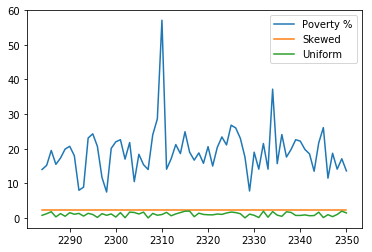

In [49]:
#Skewness for Poverty Percent, Age 0-17 of all counties
Poverty_Percent = PA_counties_info['Poverty Percent, Age 0-17']
skewed_data = PA_counties_info["Poverty Percent, Age 0-17"].skew()
uniform_data = np.random.uniform(0,2, size=67)

data_df = pd.DataFrame({"Poverty %":Poverty_Percent,
                       "Skewed":skewed_data,
                       "Uniform":uniform_data})
data_df.plot()

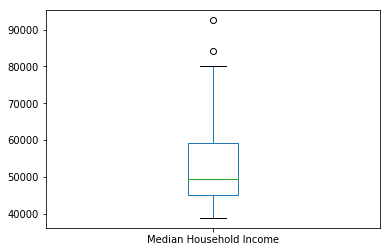

In [59]:
#box and whisker plots for Median Household Income of PA county
Median_PA_counties =PA_counties_info[['Median Household Income']]
Median_PA_counties.plot(kind='box')

Text(0.5, 1.0, 'Median income of the top 25 counties in PA ')

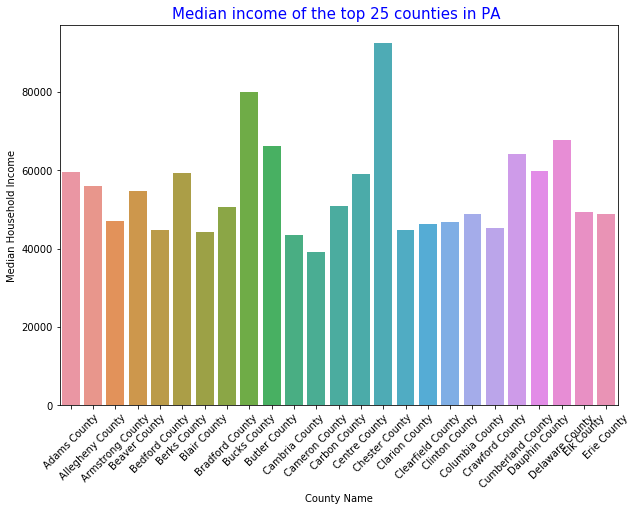

In [56]:
#Median income of the top 25 counties in PA
PA_county_data_1 = PA_county_helper()
PA_county_data_1.sort_values('Median Household Income')
plt.figure(figsize=(10,7))
ax =sns.barplot(x=PA_county_data_1['Name'][:25] ,y=PA_county_data_1['Median Household Income'][:25])
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
plt.xlabel('County Name')
plt.ylabel('Median Household Income')
plt.title('Median income of the top 25 counties in PA ',color = 'blue',fontsize=15)

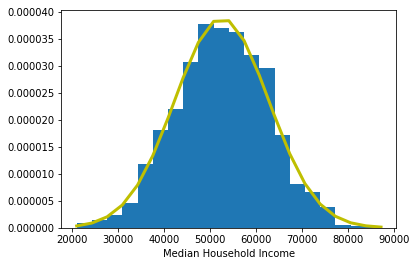

In [58]:
#Let’s see the distribution of Median Household Income for PA counties
PA_counties_data = PA_county_helper()
mean_Median_Income =PA_counties_data['Median Household Income'].mean()
std_Median_Income =PA_counties_data['Median Household Income'].std()
mu, sigma = mean_Median_Income, std_Median_Income
s = np.random.normal(mu, sigma, 1000)

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)
# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
    np.exp( - (bins - mu)**2 / (2 * sigma**2) ),       linewidth=3, color='y')
plt.xlabel('Median Household Income')
plt.show()

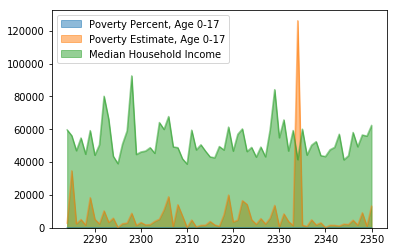

In [54]:
#Draw an area plot based on datasets
PA_counties_data.plot.area(stacked=False)
plt.show()

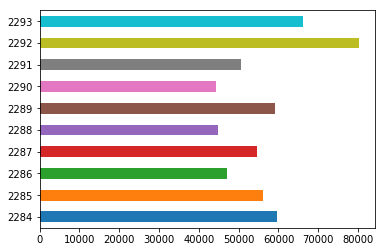

In [55]:
#top 10 highest median plot
PA_counties_data.sort_values(by=['Median Household Income'])
PA_counties_data['Median Household Income'][:10].plot(kind='barh') 
plt.show()